## Introduction

Today we'll cover:

* Unsupervised learning algorithms vs supervised learning algorithms
* K-means clustering algorithm
* Hierarchical clustering algorithm

I'd like to do a general recap of what we've covered the last few weeks, starting with the basics and finishing with clustering:
* **Probability distributions**, the **moments** of a distribution, and how each will relate to our models
* Important regression concepts: **t-statistics**, **z-scores**, **p-values**, **F-statistics**, **R-squared**, **adjusted R-squared**, **multicollinearity**, and **AIC/BIC** (the smaller the better)
* **Prediction vs Inference**
    * **Classification vs Regression**
    * **Forecasting** *rather than* **inferring** when dealing with **time series** data
* The **Training set** and **Test set**
* **Bias-Variance tradeoff** and how it relates to **prediction**
    * Linear and nonlinear relationships
* **Simple and Multiple Linear Regression**, for inference as well as prediction
* **Feature engineering**, **dummy variables**, and **interaction terms**
* **Logistic regression** in a classification context
* The **Confusion Matrix** and **accuracy** as a measure
* **Cross-sectional** data vs **time series** data vs **panel** data
    * We didn't cover panel (sometimes referred to as *longitudinal*) data models, so you'll have to research that on your own if you plan to use that data type
* **Stationarity** of a time series
* The **autocorrelation function (ACF)** and **partial autocorrelation function (PACF)**
* **Time series models**, how they're used in forecasting, and when to use them
* **Decision Trees** and **Random Forests**
* **Clustering** algorithms and when to use them
    
Following that, we're going to throw out some real world business scenarios and then, as a class, come up with different modeling techniques that we could use as solutions,
* Also, if we have the time, we'll talk about Principal Component Analysis (PCA) and Generalized Additive Models as well 

# Libraries Used

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import Image


# Supervised Learning vs Unsupervised Learning Algorithms

Statistical learning methods are typically categorized as **supervised learning** and **unsupervised learning**. In the **supervised learning** setting, the goal is to predict the values of a **response variable**, **y**, based on **explanatory variables** x_1, x_2, ..., x_p.
   
**Classical methods** considered to be **supervised learning** include:
* Regression
* Classification

**Unsupervised learning** methods refer to a class of techniques for the purpose of understanding the relationships between a set of ***p*** explanatory variables. The is **NO** response variable involved in the analysis (imagine a regression equation where the left hand side, or the **'y'**, did not exist, and all we had were the **'x'**, or the EXPLANATORY, variables to work with).

**Examples** of **UNsupervised learning methods** include:
* K-means clustering
* Hierarchical clustering


# Clustering and Unsupervised Learning Algorithms

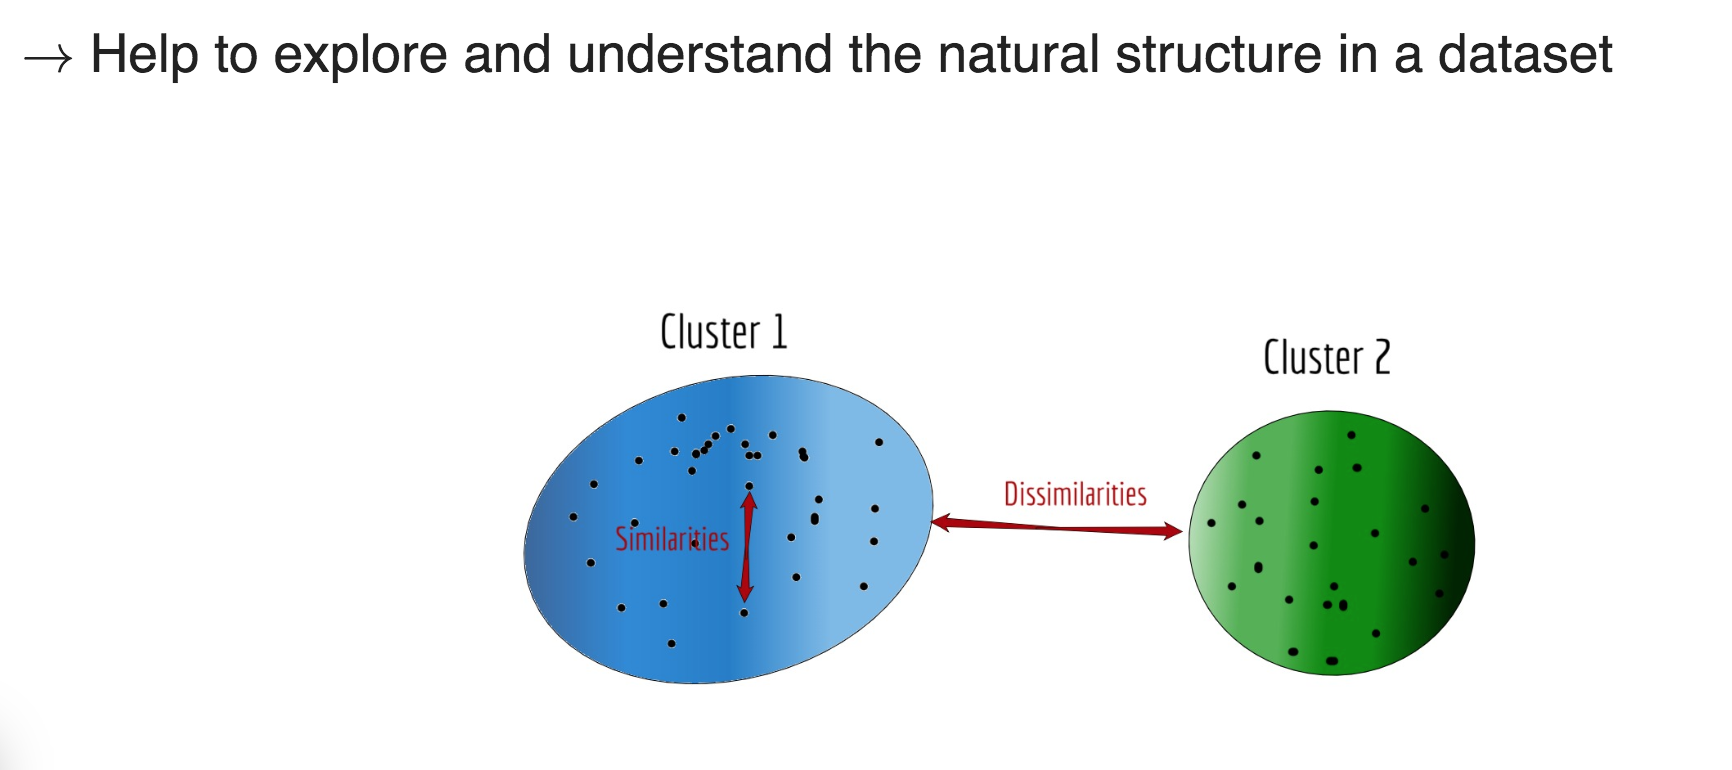

In [2]:
Image(filename = '/Users/MattMecca/Desktop/Jain Institute/Mixture Models/Clustering and why we do it.png')


**Clustering** is used to find structure in **unlabeled data**. It’s the most common form of unsupervised learning. **Given a dataset you don’t know anything about**, a clustering algorithm can **discover groups of objects** where the **average distances** between the **members of each cluster** are **closer than to members in other clusters**, such as this:

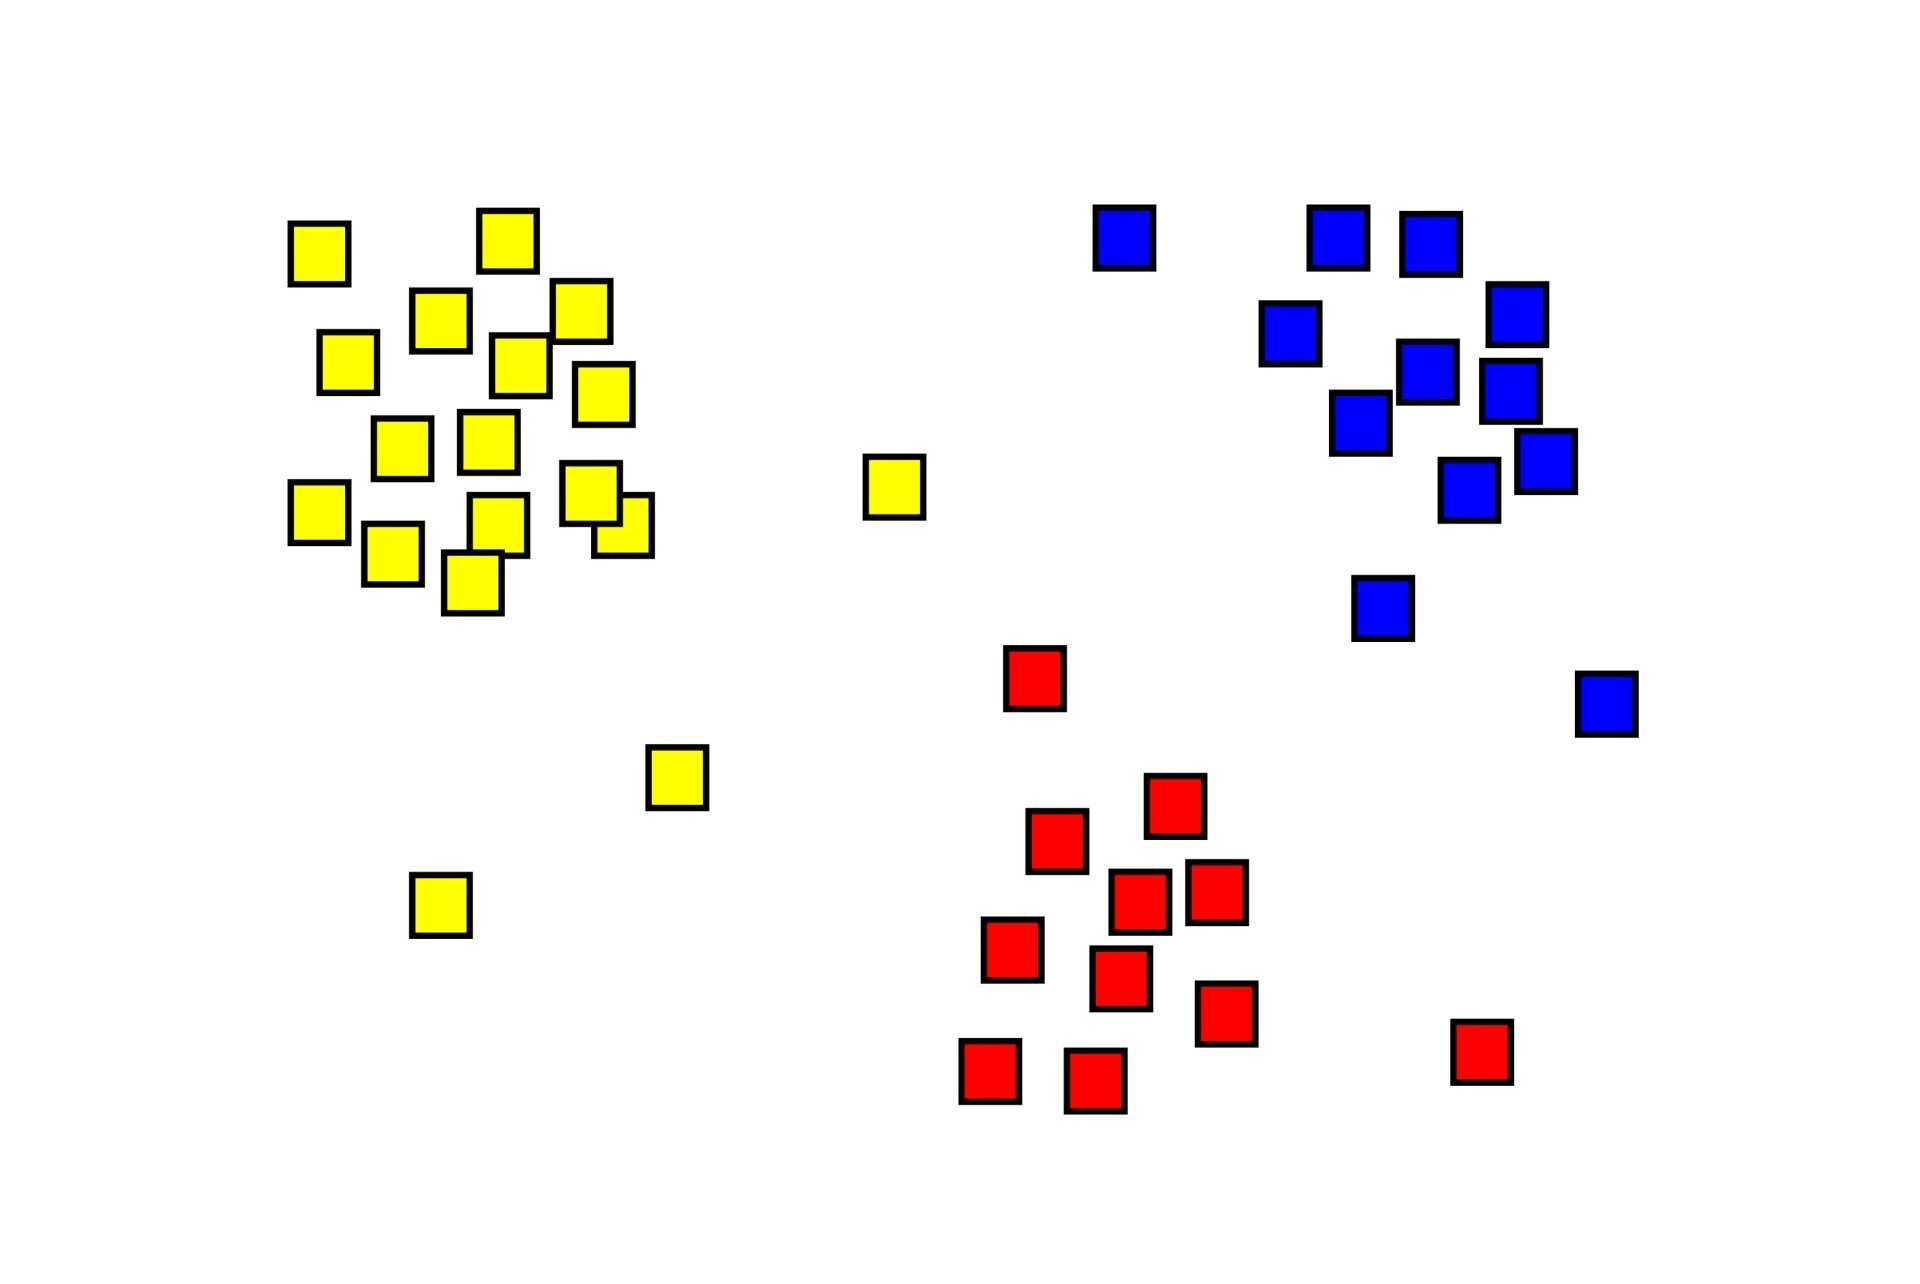

In [15]:
Image(filename = '/Users/MattMecca/Documents/Work-related material/Flatiron School/Script Pictures/clustering example.png')


This illustrates a simple **2-dimensional example**. Clusters will usually have a **higher dimensionality**.

Clustering has many practical applications. For instance, it’s used in **marketing** to **assess the demographics of consumers**. By knowing more about different market segments you can **target consumers more accurately with commercials**.

It's also used for **latent class modeling**. What is latent class modeling, you ask? **Latent class modeling** refers to a group of techniques for identifying unobservable, or **latent**, subgroups within a population. **Latent variables** are variables that are **INFERRED** rather than **OBSERVED**. They're **inferred** through a mathematical model from other **variables** that are observed (directly measured). Right now, for example, I'm working on developing a model that predicts student's income following graduation. The dataset we have is relatively comprehensive, but it doesn't tell us whether or not the student dropped out of college. We're trying to preen those two groups apart using the **Gaussian Mixture algorithm** (cousin of the **K-means clustering algorithm** and another **unsupervised learning algorithm**)

## K-means Clustering

### Business Uses

https://www.datascience.com/blog/k-means-clustering

The **K-means clustering algorithm** is used to find groups which have not been explicitly labeled in the data. This can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the correct group.

This is a versatile algorithm that can be used for any type of grouping. Some examples of use cases are:

#### Behavioral segmentation:
* Segment by purchase history
* Segment by activities on application, website, or platform
* Define personas based on interests
* Create profiles based on activity monitoring

#### Inventory categorization:
* Group inventory by sales activity
* Group inventory by manufacturing metrics

#### Sorting sensor measurements:
* Detect activity types in motion sensors
* Group images
* Separate audio
* Identify groups in health monitoring

#### Detecting bots or anomalies:
* Separate valid activity groups from bots
* Group valid activity to clean up outlier detection

In addition, monitoring if a tracked data point switches between groups over time can be used to detect meaningful changes in the data.

The **Κ-means clustering algorithm** uses iterative refinement to produce a final result. The algorithm inputs are the number of clusters Κ and the data set. The data set is a collection of features for each data point. The algorithms starts with initial estimates for the Κ centroids, which can either be randomly generated or randomly selected from the data set. The algorithm then iterates between two steps:

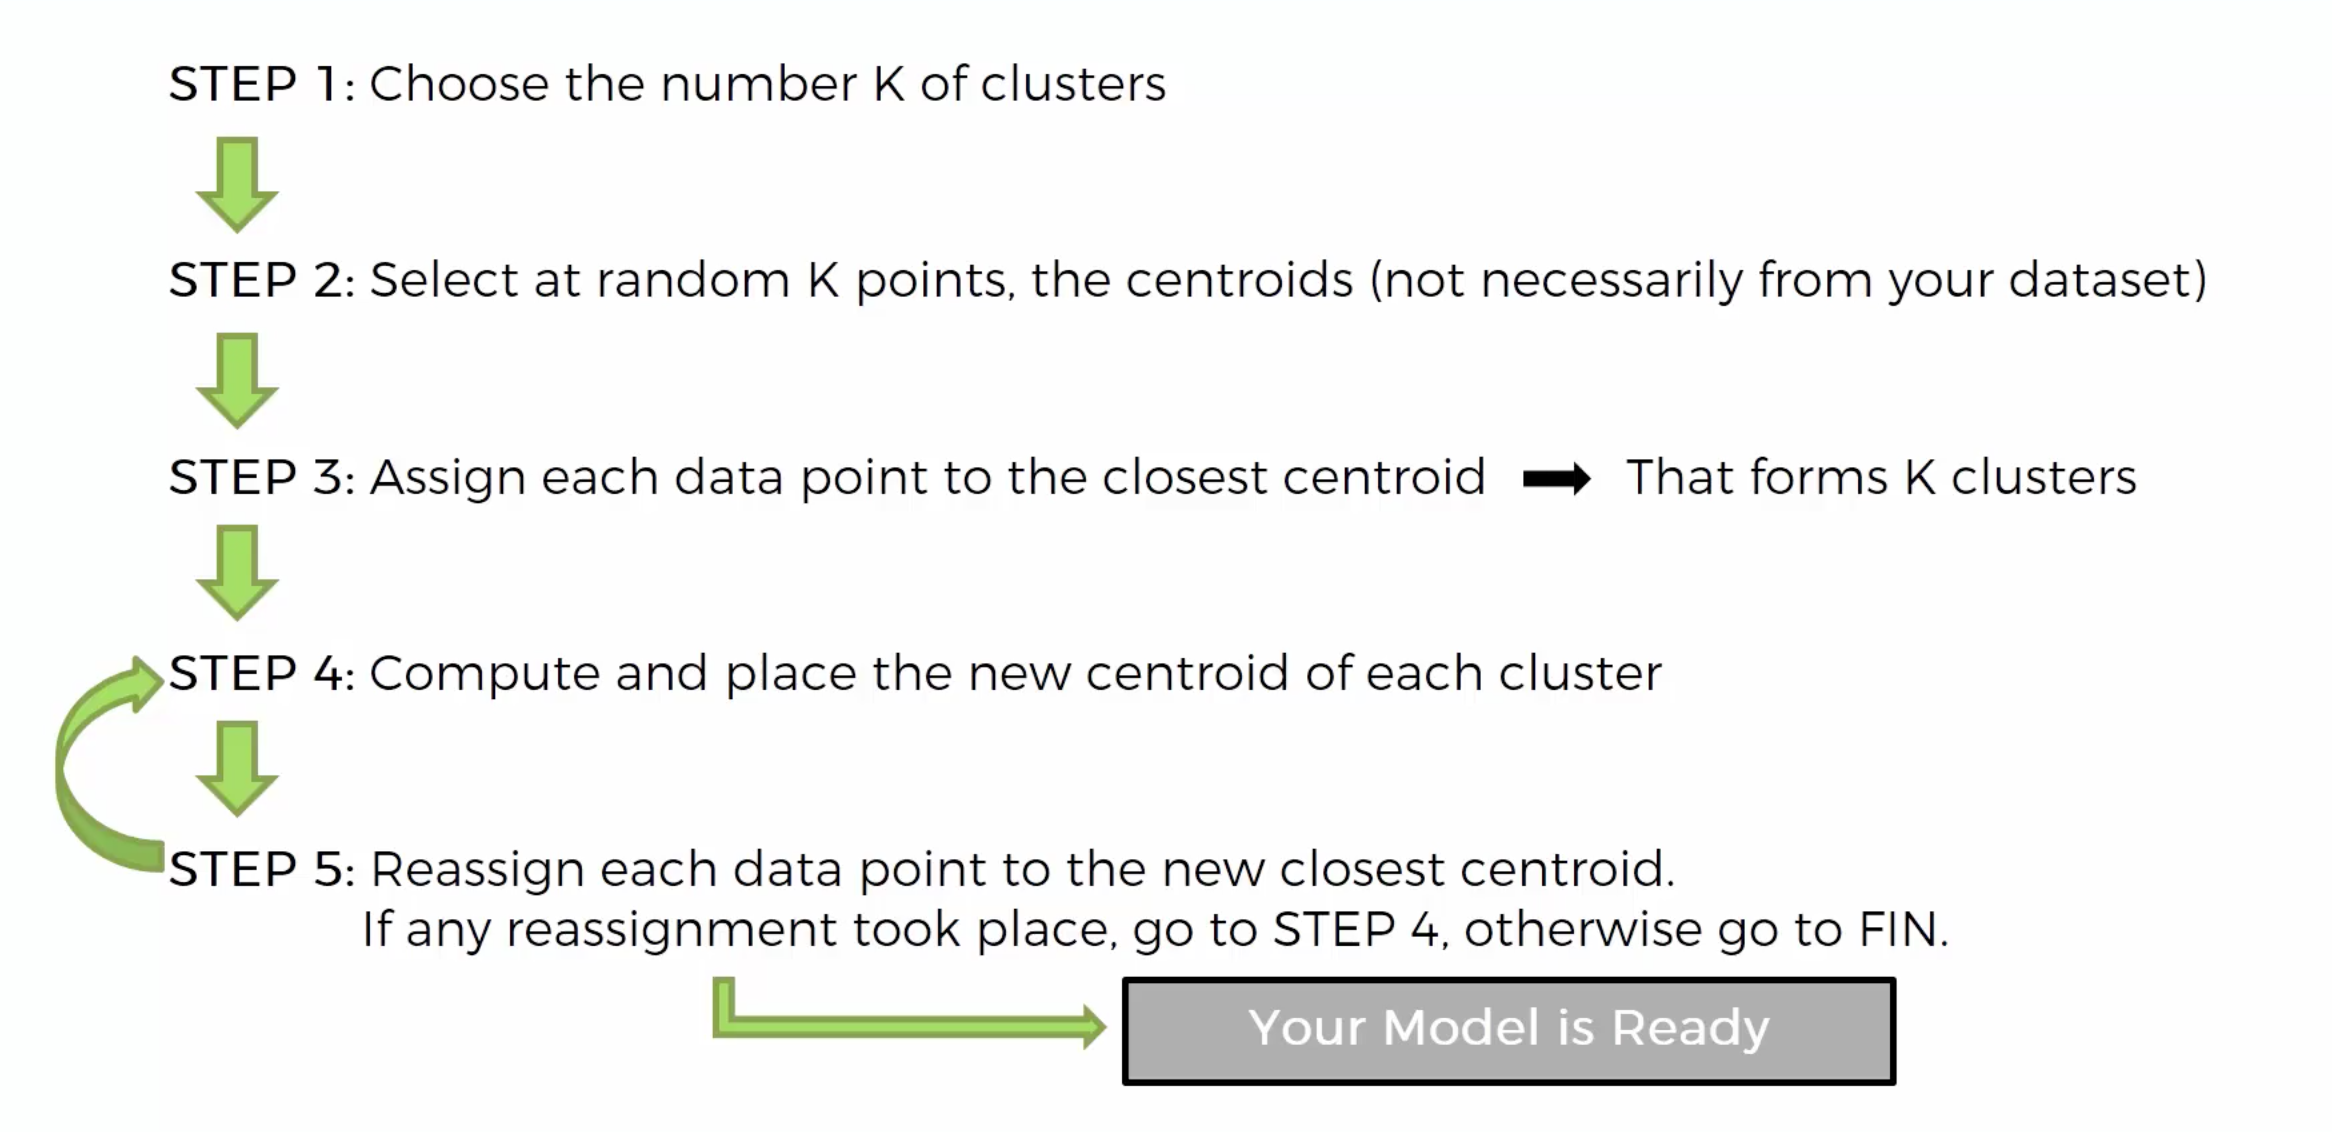

In [4]:
Image(filename = '/Users/MattMecca/Documents/Work-related material/Flatiron School/Script Pictures/K-means Clustering Algorithm.png')


In [9]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 23 19:35:18 2017

@author: MattMecca
"""

#### K-Means Clustering ####

### The K-Means algorithm will dissect your data into diff. CLUSTERS by using a
### method that plots points (or CENTROIDS) at first randomly before manuevering 
### or repositioning via an iterative "optimal location" process

### RANDOM INITIALIZATION TRAP: B/c we choose our centroids randomly, initially, 
### we can very easily have a scenario where the clusters are too disparate,  
### too apart, and we end up mis-classifying our CLUSTERS. Python and R actually
### account for this poss.y by running the K-Means++ algorithm whenever we go to 
### run the K-Means

### SELECTING THE RIGHT # OF CLUSTERS: Using Within Cluster Sum of Squares, or
### WCSS, we can reasonably determine whether we have too many or too few centroids 
### based on the sq. dist. b/w the cluster's obs.s and the centroid summed. The
### WCSS will continue to decrease exponentially as you add more and more 
### clusters to the eq. The ELBOW METHOD says, bascially, that the number of 
### clusters that MARKS a significant drop-off in WCSS REDUCTION is the number
### that you should go with (situations are not always so clear cut, may require
### a judgement call)

### We canNOT choose any random initial centroids at the beginning of K-Means.

## Importing the Null Dataset with Pandas ##

dataset = pd.read_csv('/Users/MattMecca/Documents/Data Science Material/Machine Learning Template Folder/Part 4 - Clustering/Section 24 - K-Means Clustering/Mall_customers.csv')
X = dataset.iloc[:, [3, 4]].values # X is our array, or matrix, and columns 3 
# and 4 (in Python, indicies start @ 0) are Annual Incomes and Spending Scores

# This is when we start using K-Means specifically



In [10]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
## Using the Elbow Method to find the Optimal Number of Clusters ##

from sklearn.cluster import KMeans # Importing the KMeans class (or blueprint)
wcss = [] # We first calculate the WCSS for TEN DIFF. numbers of clusters, and   
          # so we are going to use a LOOP here (ten diff. ITERATIONS)
for i in range(1, 11): # Rem. that in Python 11 is excluded
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) 
    # kmeans is our OBJECT (our house)
    # init being set = to kmeans++ rather than random helps us avoid the RANDOM 
    # INITIALIZATION trap
    # max_iter is the maximum # of iterations that can be run to find the final
    # location of the cluster's centroids
    # n_init is the # of times the kmeans++ algorithm will be run with DIFF.
    # INITIAL CENTROIDS
    # By not adding the other arguments, our KMeans function automatically 
    # assumes their DEFAULT values
    kmeans.fit(X) # FIT is a METHOD (a tool) of the CLASS (blueprint) KMeans
    # that FITS the kmeans++ algorithm to your data
    wcss.append(kmeans.inertia_) # Used to calc. the WC Sum of Squares (WCSS)  
                                 # and append it to our list
    # This concludes our loop
    



<function matplotlib.pyplot.show(*args, **kw)>

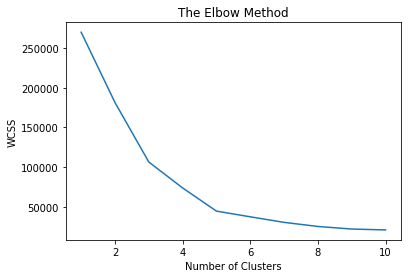

In [12]:
## Plotting the Elbow Method Graph ##

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show
# We see that the ELBOW is at n_clusters = 5




### Elbow Method

When K increases, the centroids are closer to the clusters centroids.

The **improvements will decline**, at some point **rapidly**, creating the **elbow shape**.

That point is the optimal value for K. In the image above, K = 5.

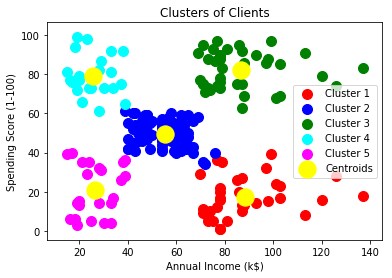

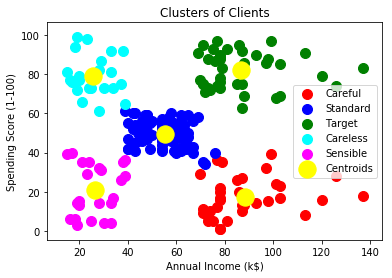

In [13]:
## Applying K-Means to the Mall Dataset ##

kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X) #The fit_predict method tells to WHICH CLUSTER each OBS., or CLIENT, it BELONGS


## Viscualizing the Clusters ##

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1') 
# X[y_kmeans == 0, 0] specifies that we want the OBS.s belonging to CLUSTER 1
# and that we want the FIRST column of our data X (reason for our second 0). By
# doing this we make available all of the x-COORDINATES that BELONG to CLUSTER 1
# X[y_kmeans == 0, 1] specifies that we want the OBS.s belonging to CLUSTER 1
# and that we want the SECOND column of our data X (reason for our second 0). By
# doing THIS we make available all of the y-COORDINATES that BELONG to CLUSTER 1
# (I.e., the first column of X is our x-coordinate, the second column of X is 
#  our y-coordinate). 's' is the SIZE of our data points (?) and 'c' is the COLOR
# of our cluster
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') 
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3') 
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') 
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# We do this in turn for every cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
# This last line (102) is us plotting the CENTROIDS. The cluster_centers attribute
# returns the COORDINATE of the CENTROIDS. To highlight them well, we choose
# s = 300 (making it larger) and star color YELLOW

plt.title('Clusters of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend() # Gives us a legend of the diff. LABELS
plt.show()


## Labeling the Clusters by Client's Perceived Types ##

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Careful') 
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Standard') 
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Target') 
# With both a HIGH level of income as well as a HIGH spending score, this is the
# particular demographic the MALL would like to target during a MARKETING CAMPAIGN
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless') 
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()




## Hierarchical Clustering

**Hierarchical clustering**, as the name suggests is an algorithm that builds hierarchy of clusters. This algorithm starts with all the data points assigned to a cluster of their own. Then two nearest clusters are merged into the same cluster. In the end, this algorithm terminates when there is only a single cluster left.

#### Hierarchical Clustering algorithm

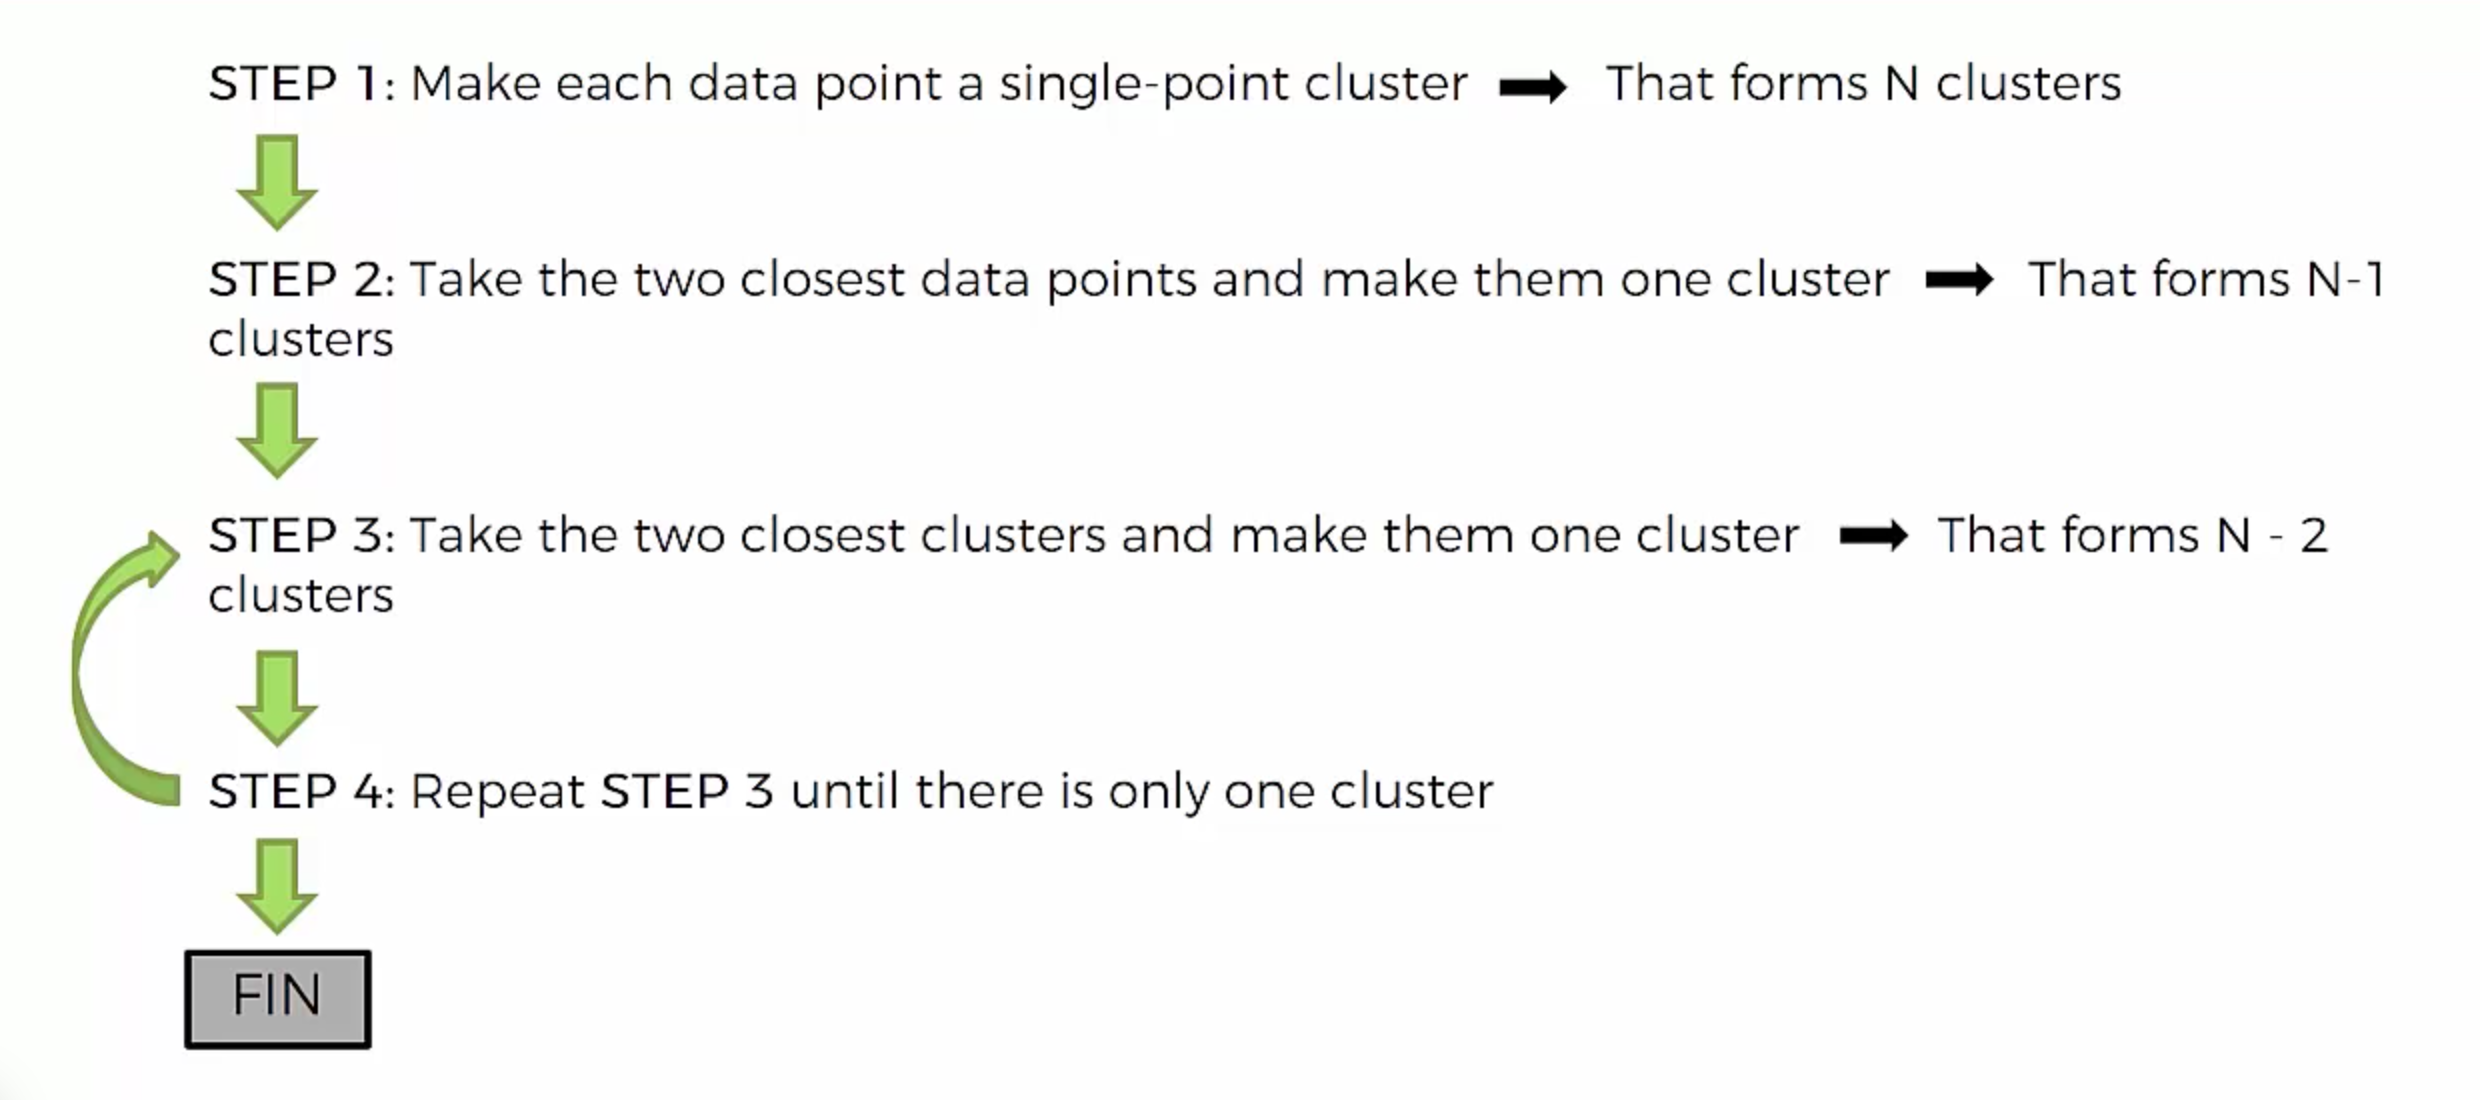

In [5]:
Image(filename = '/Users/MattMecca/Documents/Work-related material/Flatiron School/Script Pictures/Hierarchical Clustering Algorithm.png')


In [14]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Jan 24 20:13:26 2017

@author: MattMecca
"""

#### Hierarchical Clustering ####

### Two different types of Hierarchical Clustering: AGGLOMERATIVE and DIVISIVE.
### AGGLOMERATIVE (our FOCUS): the BOTTOM-UP approach (starting at the bottom 
### (N clusters) and working your way up (to ONE cluster)); DIVISIVE: the 
### converse, or the TOP-DOWN approach (starting at the top and working your 
### way down). A DENDROGRAM is the memory, basically, of our agglomerative HC
### algorithm's process. When choosing an optimal # of clusters for our model, 
### we simply look for the tallest vertical line (or the cluster connecting the 
### highest level of dissimilarity by Euclidean distance) that does NOT cross 
### a HORIZONTAL LINE and we STOP (set our intersecting line around) THERE. 

### Note that Hierarchical Clustering (HC) is almost IDENTICAL to K-Means 
### clustering

### Dendrograms are based on within-cluster VARIANCE

### K-Means performs better than Hierarchical Clustering on large datasets

## Import the Mall Dataset with Pandas ##

# All we have to change is Mall_Customers.csv (data source) and the [3, 4] of
# dataset.iloc[:, [3, 4]].values in order to apply this code to real world 
# application 

dataset = pd.read_csv('/Users/MattMecca/Documents/Data Science Material/Machine Learning Template Folder/Part 4 - Clustering/Section 24 - K-Means Clustering/Mall_customers.csv')
# Closer the spending score is to 100, the more the customer spends
X = dataset.iloc[:, [3, 4]].values # Sets third and fourth columns as separate,
# ind. var.s (feature var.s) matrix: annual income and spending score, respectively



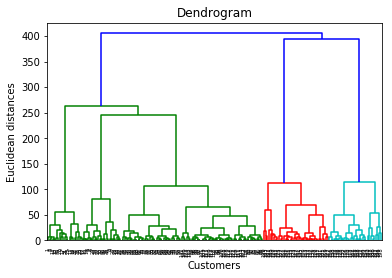

In [28]:
### Here, in Hierarchical Clustering (HC), we use the DENDROGRAM, not the Elbow 
### Method (as we did in K-Means clustering)

## Using the Dendrogram to find the Optimal # of Clusters – Step 2 ##
import scipy.cluster.hierarchy as sch # Importing the "scipy" library to do HC,
# we SIMPLIFY the name to "sch"
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward')) # "linkage" is the algorithm itself of
# hierarchical clustering (HC); the "ward" method tries to minimize the Within
# Cluster Variance (whereas w/ K-Means we were trying to minimize the WCSS), or
# the variance within each cluster
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show() # Specifies our plot is DONE and READY to be DISPLAYED


In [19]:
## Fitting Hierarchical Clustering to the Mall Dataset - Step 3 ## 

from sklearn.cluster import AgglomerativeClustering # "Agglomerative clustering"
# a type of HC methodology -- detailed above (anything that is NOT agglomerative 
# clustering is automatically DIVISIVE clustering)
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X) # Here, we are fitting the agglomerative algortihm to
# our data, or X. In the end, y_hc specifies which CLUSTER each CUSTOMER 
# belongs to. n_clusters = 5 due to the dendrogram's results. I.e., 
# AgglomerativeClustering is used to fit hierarchical clustering to the dataset


The horizontal axis of the dendrogram represents the **distance** or **dissimilarity between clusters**. The vertical axis represents the objects and clusters. The dendrogram is fairly simple to interpret. Remember that our main interest is in similarity and clustering. Each joining (fusion) of two clusters is represented on the graph by the splitting of a horizontal line into two horizontal lines. The horizontal position of the split, shown by the short vertical bar, gives the distance (dissimilarity) between the two clusters.

**Helpful video showing dendrogram construction**: 

https://youtu.be/XJ3194AmH40?t=4m28s

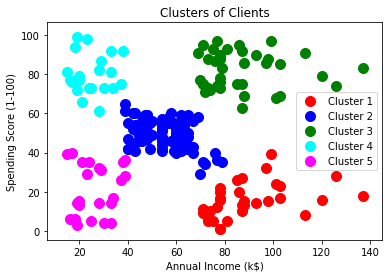

In [20]:
## Visualizing the Clusters - Step 4 ##

# Here, we simply copy and paste the code from K-Means clusters and then revise

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1') 
# X[y_hc == 0, 0] specifies that we want the OBS.s belonging to CLUSTER 1
# and that we want the FIRST column of our data X (reason for our second 0). By
# doing this we make available all of the x-COORDINATES that BELONG to CLUSTER 1
# X[y_hc == 0, 1] specifies that we want the OBS.s belonging to CLUSTER 1
# and that we want the SECOND column of our data X (reason for our second 0). By
# doing THIS we make available all of the y-COORDINATES that BELONG to CLUSTER 1
# (I.e., the first column of X is our x-coordinate, the second column of X is 
#  our y-coordinate). 's' is the SIZE of our data points (?) and 'c' is the COLOR
# of our cluster
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') 
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3') 
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') 
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# We do this in turn for every cluster
plt.title('Clusters of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend() # Gives us a legend of the diff. LABELS
plt.show()


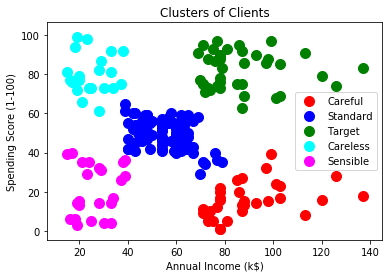

In [25]:
## Analyzing and Renaming the Clusters – Step 5 ##

# For personal use, unless you've REDUCED the DIMENSIONALITY, do not execute 
# this last piece of code if you're doing  clustering in more than two dimensions
# (won't be able to plot)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful') 
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard') 
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target') 
# May be that there are more obs.s in the STANDARD group, which would make them 
# responsible for the bulk of the mall's revenue and perhaps their "true" TARGET 
# audience
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless') 
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend() # Gives us a legend of the diff. LABELS
plt.show()


# Recap

## Model Heuristics

These are some of the modeling techniques that we've covered and the general pros and cons that come with them. ***Note*** that these pictures are **not** comprehensive; they do **not** touch on **time series** modeling.

## Regression

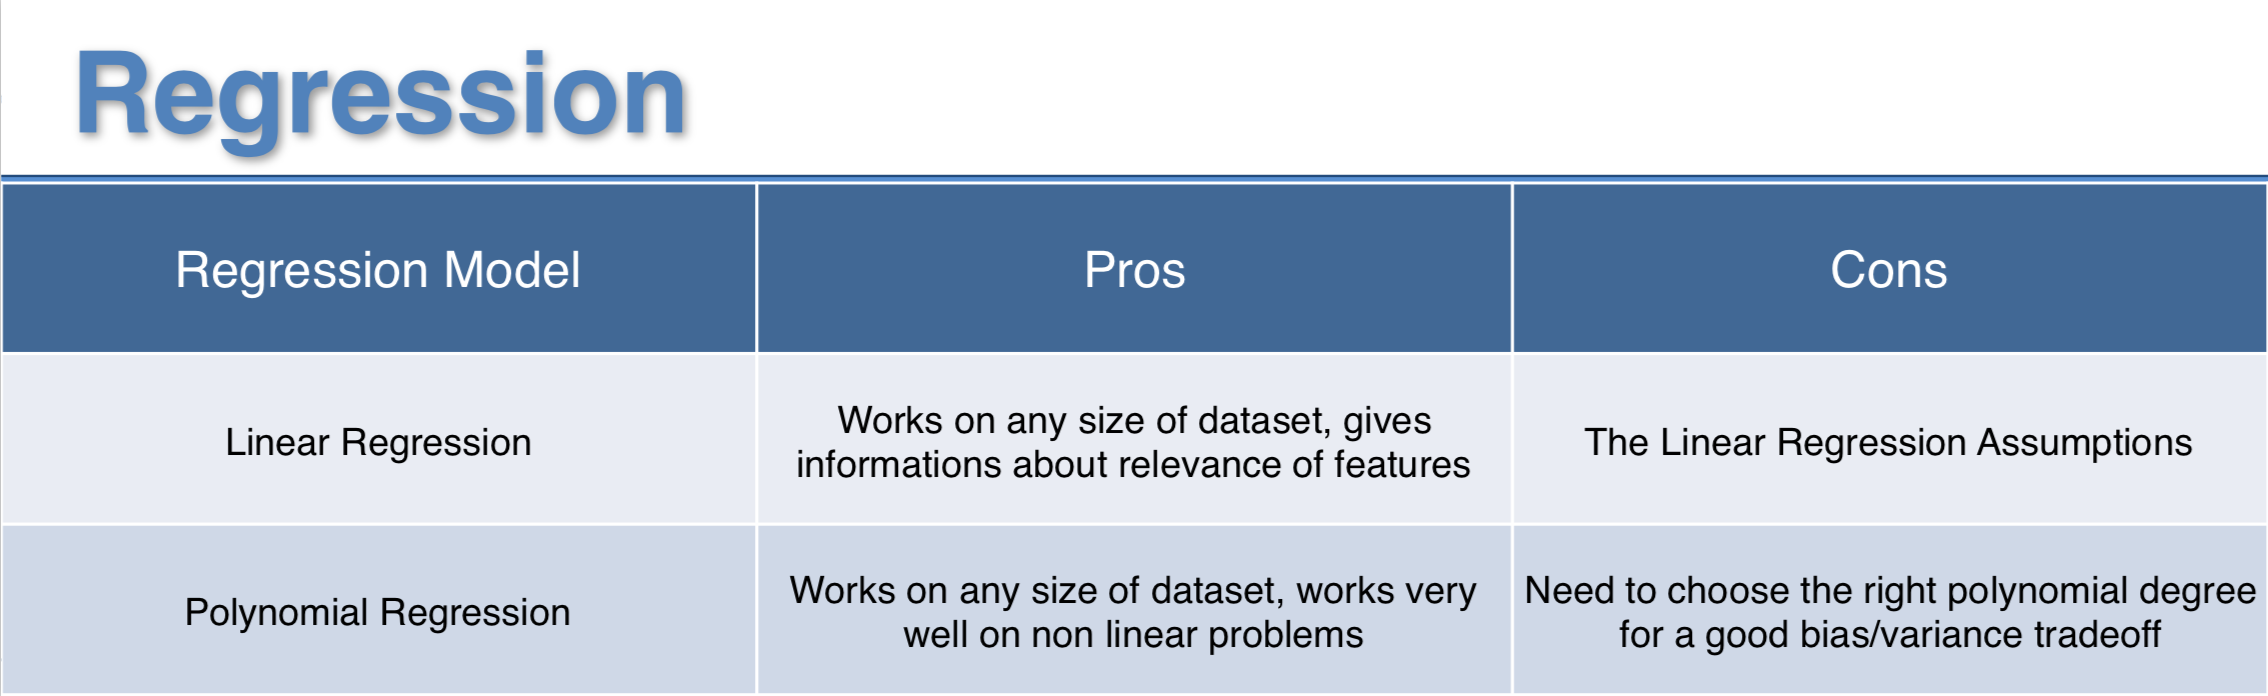

In [9]:
Image(filename = '/Users/MattMecca/Documents/Work-related material/Flatiron School/Script Pictures/Regression –– Pros & Cons.png')



## Classification

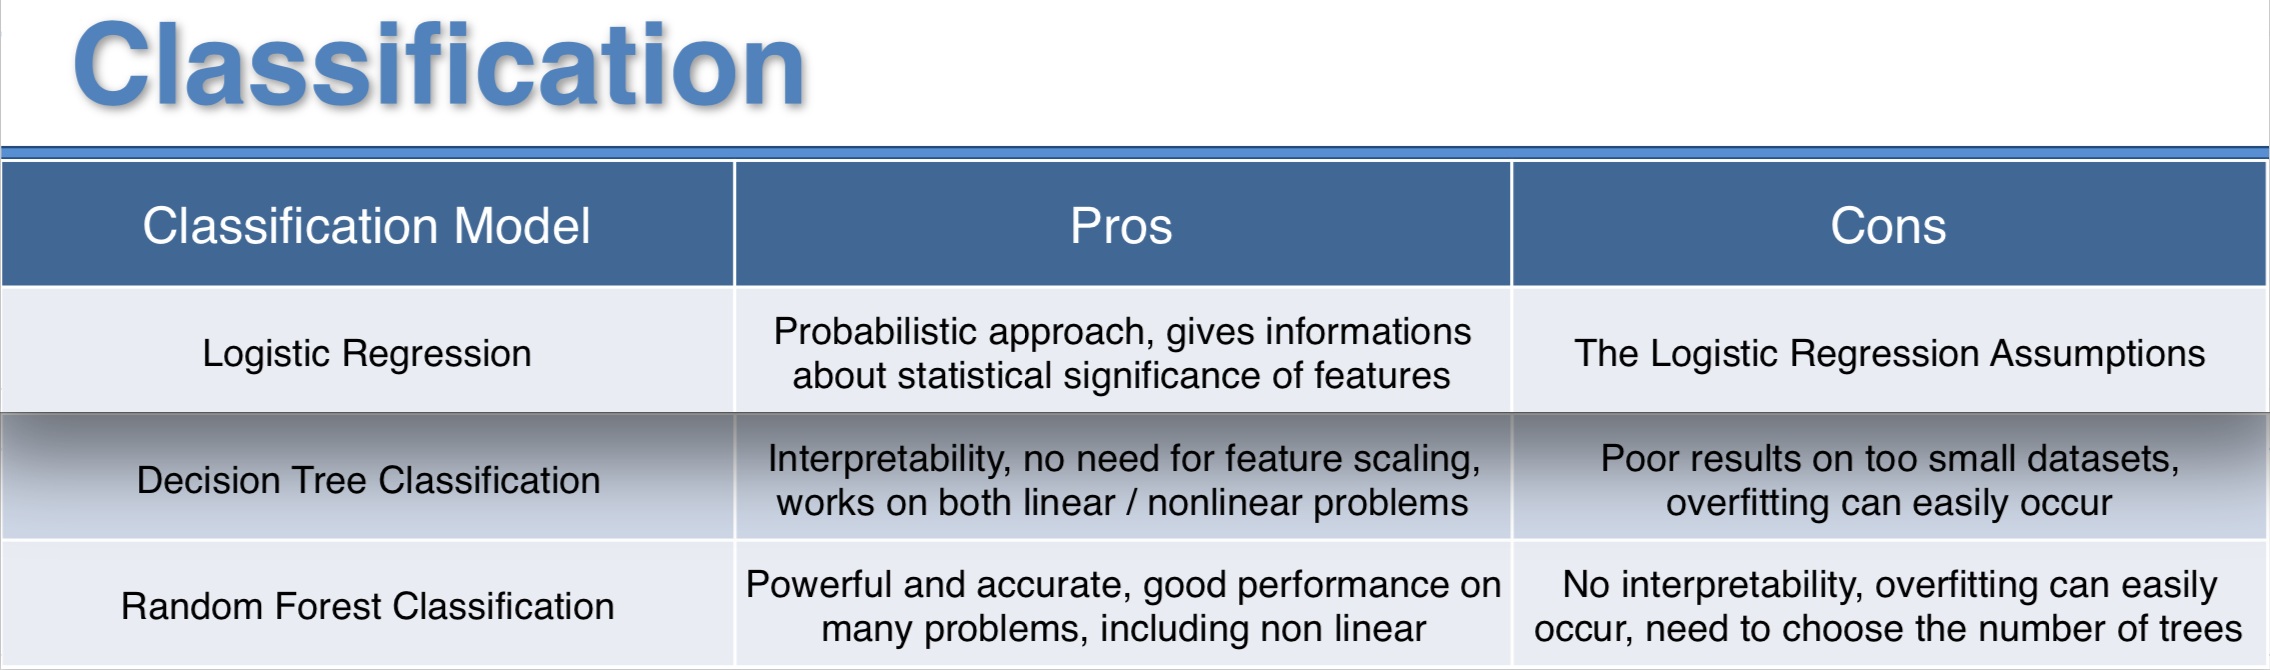

In [10]:
Image(filename ='/Users/MattMecca/Documents/Work-related material/Flatiron School/Script Pictures/Classification –– Pros & Cons.png')


## Clustering

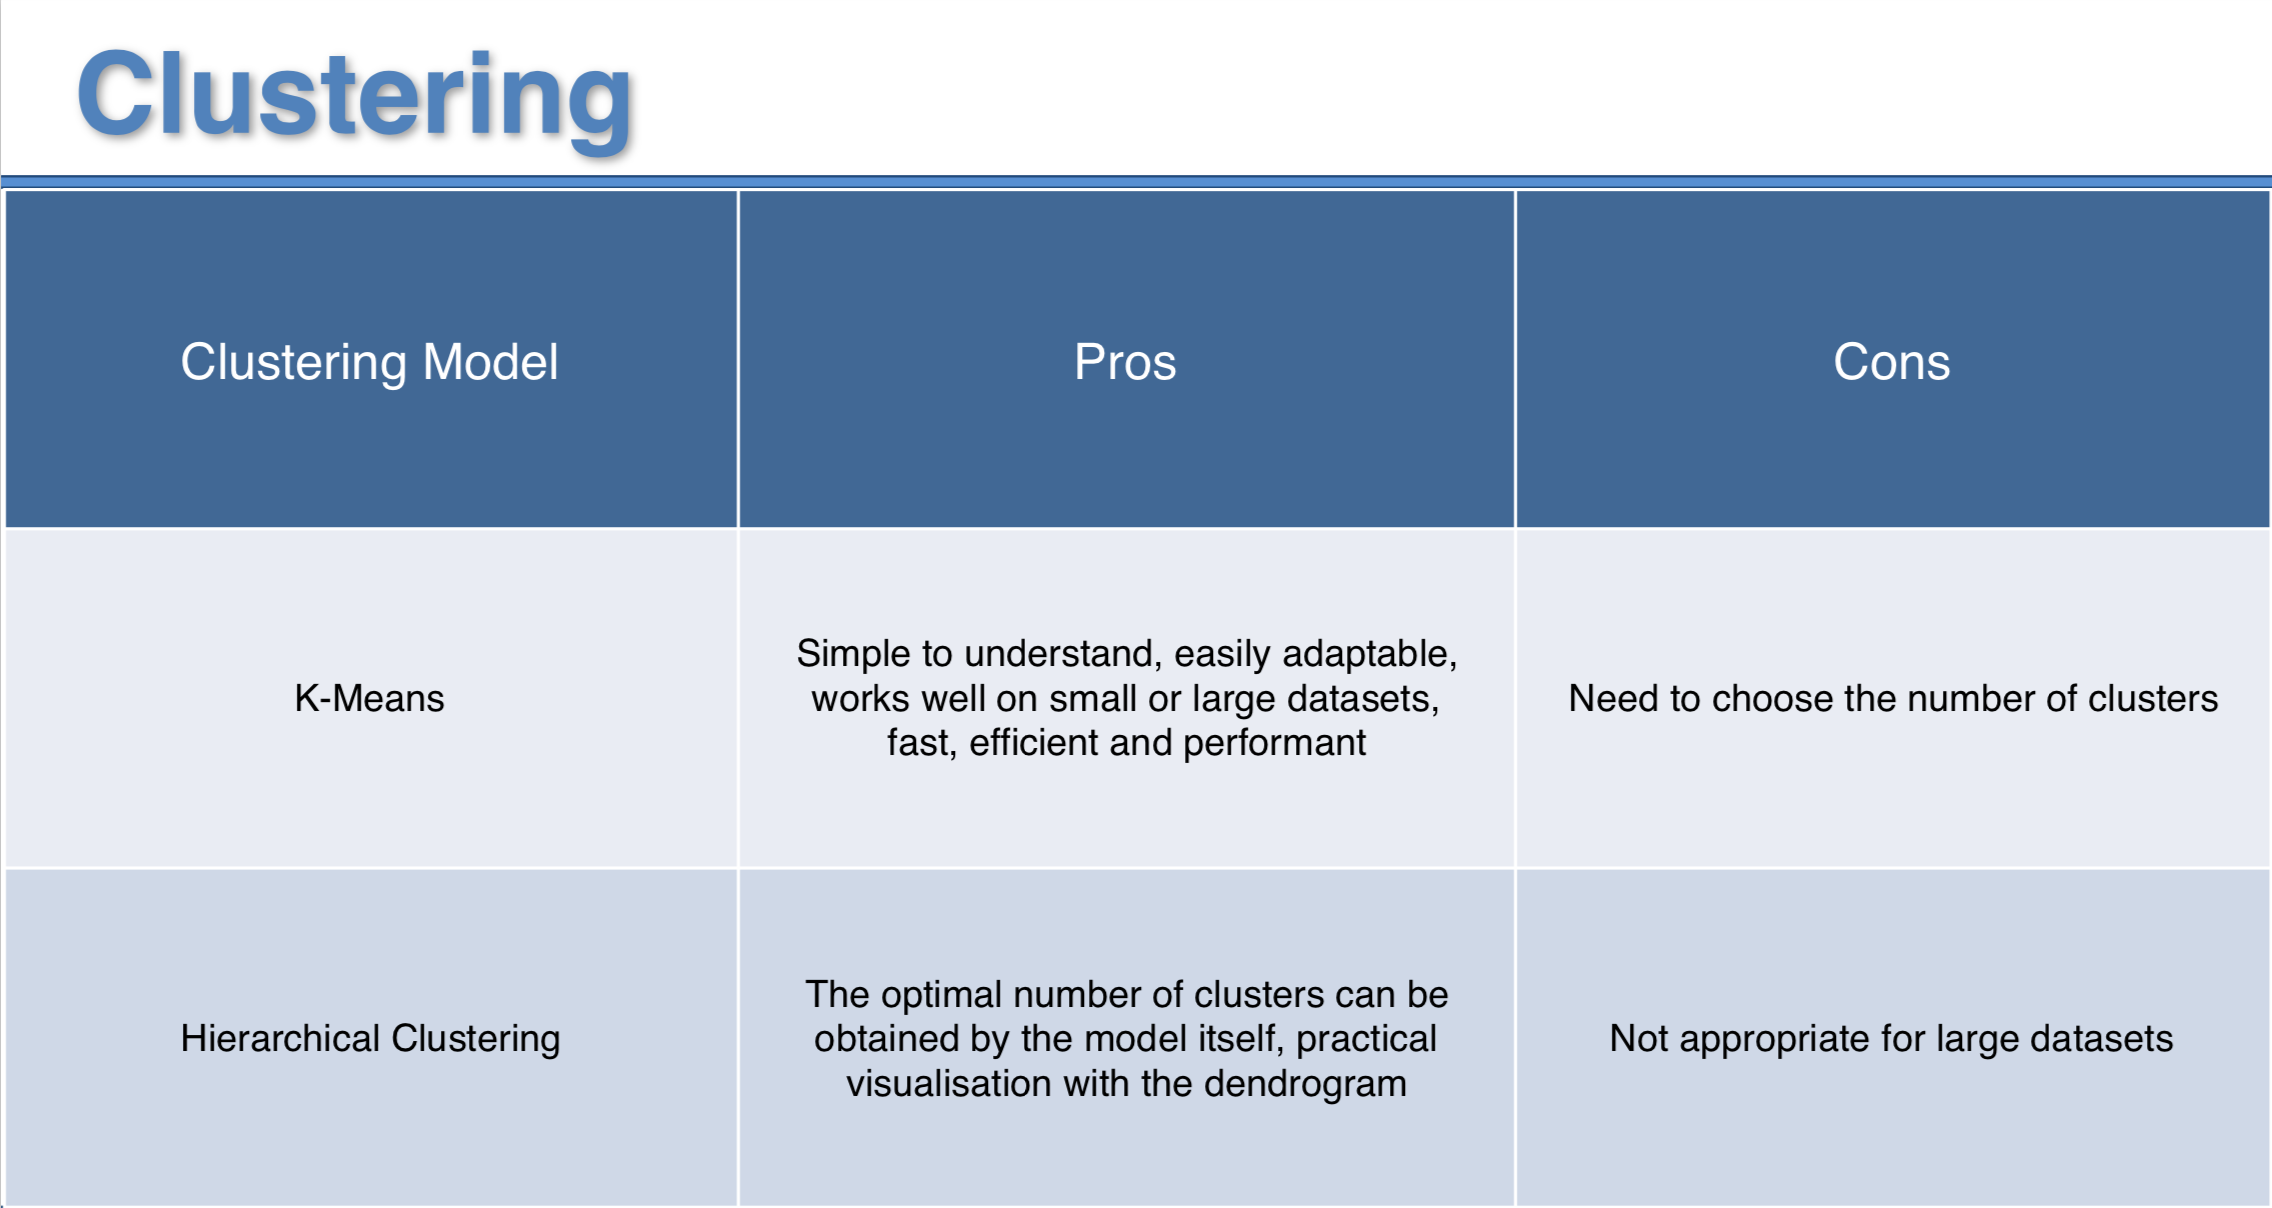

In [11]:
Image(filename ='/Users/MattMecca/Documents/Work-related material/Flatiron School/Script Pictures/Clustering –– Pros & Cons.png')


## Time Series Forecasting

#### Stationarity refresher

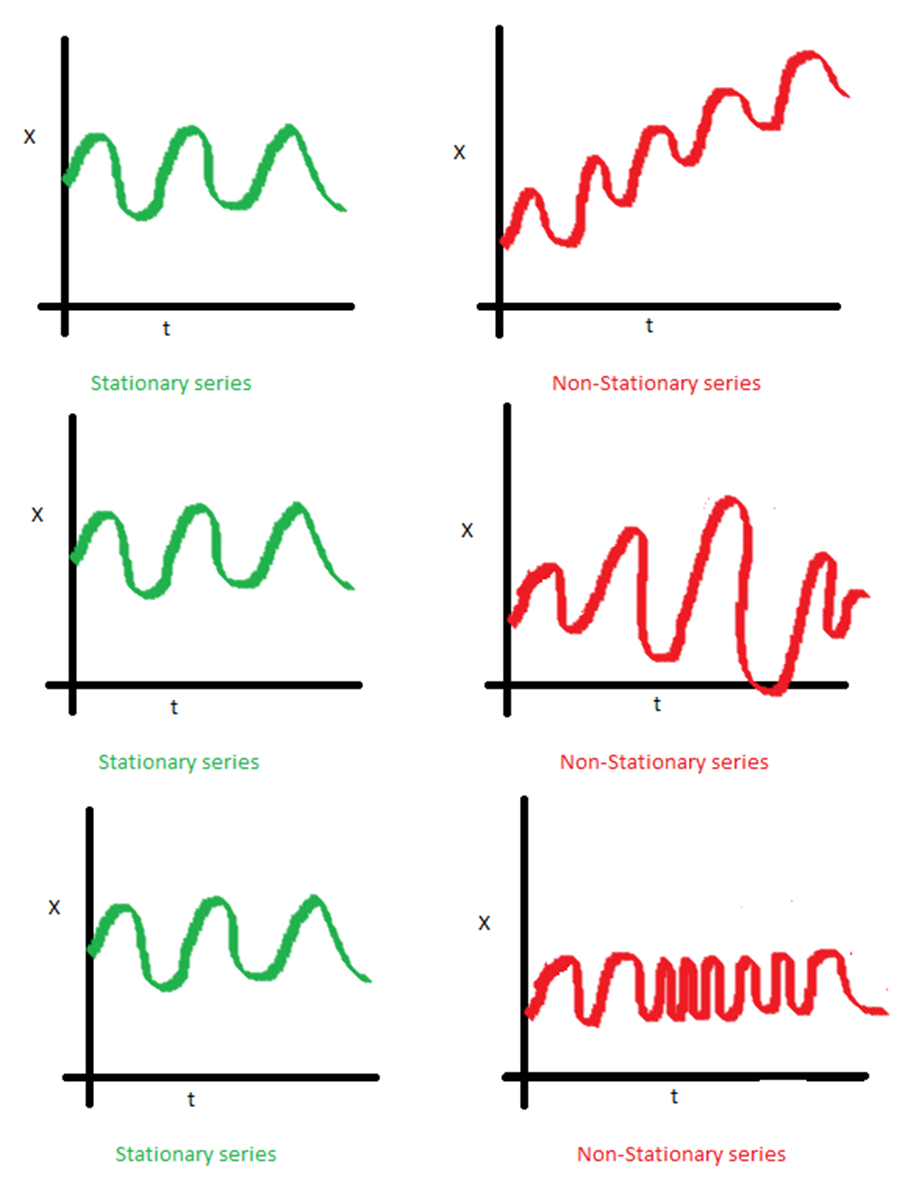

In [12]:
Image(filename ='/Users/MattMecca/Documents/Work-related material/Flatiron School/Script Pictures/Stationary vs Nonstationary Time Series.png')


### ARIMA(p, d, q) Forecasting Model

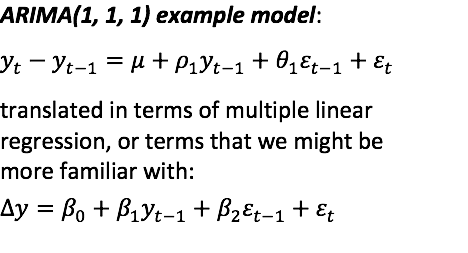

#### Pros

* Can take into account autocorrelation amongst the dependent variable's auto-lagged term (or the 'autoregressive' AR(p) component), the residual effect of shocks in the form of lagged error terms (i.e., the 'moving average' MA(q) component), and nonstationary time series (the series differencing 'integrated of order d' I(d) component).

* Works well with smaller datasets

#### Cons

* Does not take into account seasonality

* Does not take into account 'exogenous' variables independent of 'y' (i.e., other 'x' variables)

* Model (regression equation) is **linear** by design, and thus it has a hard time accounting for **nonlinear** relationships

### SARIMA(p, d, q)(P, D, Q)_m Forecasting Model

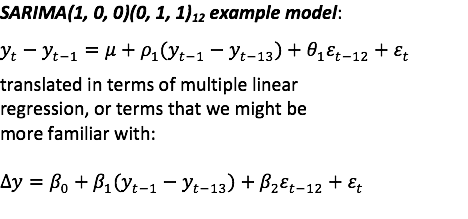



#### Pros

* Can take into account autocorrelation amongst the dependent variable's auto-lagged term (or the 'autoregressive' AR(p) component), the residual effect of shocks in the form of lagged error terms (i.e., the 'moving average' MA(q) component), and nonstationary time series (the series differencing 'integrated of order d' I(d) component).

* Works well with smaller datasets

#### Cons

* Does not take into account 'exogenous' variables independent of 'y' (i.e., other 'x' variables)

* Has a tough time dealing with seasonality when data is recorded at a ***higher frequency*** (minutes, e.g.)

* Model (regression equation) is **linear** by design, and thus it has a hard time accounting for **nonlinear** relationships

### SARIMAX(p, d, q)(P, D, Q)_m Forecasting Model

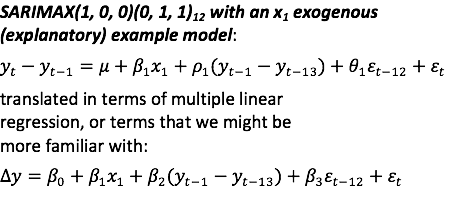

#### Pros

* Can take into account autocorrelation amongst the dependent variable's auto-lagged term (or the 'autoregressive' AR(p) component), the residual effect of shocks in the form of lagged error terms (i.e., the 'moving average' MA(q) component), and nonstationary time series (the series differencing 'integrated of order d' I(d) component).

* Takes seasonality into account

* Allows us to factor in exogenous (explanatory or independent) variables

* Works well with smaller datasets

#### Cons

* Has a tough time dealing with seasonality when the data is recorded at a ***higher frequency*** (minutes, e.g.)

* Model (regression equation) is **linear** by design, and thus it has a hard time accounting for **nonlinear** relationships amongst dependent and right hand side variables

### ***NOTE***: the code in the below web page will show you how to better use Statsmodel's SARIMAX forecasting function in Python (scroll to the bottom):

https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html

### The code included in the lecture is a bit buggy when it came to forecasting

## Helpful Links/Tutorials

### Clustering

**K-means** and **Hierarchical**: https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097

**K-means**: https://www.datacamp.com/community/tutorials/k-means-clustering-python

### Regression

https://lectures.quantecon.org/py/ols.html

https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

https://medium.freecodecamp.org/data-science-with-python-8-ways-to-do-linear-regression-and-measure-their-speed-b5577d75f8b

### Classification

**Logistic regression**: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

**Random Forest**: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

### Time Series

http://www.blackarbs.com/blog/time-series-analysis-in-python-linear-models-to-garch/11/1/2016

Stationarity (**Augmented Dickey-Fuller Test**): http://dacatay.com/data-science/part-3-time-series-stationarity-python/

https://www.kaggle.com/sumi25/understand-arima-and-tune-p-d-q